In [1]:
#### importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### Getting the data
def read_data():
    data = pd.read_excel("C:/Data Science/Oct 2023/29 Oct 2023/Project - 3&4_Multiple_Reg/ToyotaCorolla.xlsx")
    return data

In [3]:
#### Calling the read data function
df = read_data()
print(df.head())
print(df.info())
print(df.shape)

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [4]:
#### Preprocessing and Feature Engineering
df1 = df.copy()
print(df1)

        Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   9

In [5]:
#### Exploratory Data Analysis
df1['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [6]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

Axes(0.125,0.11;0.775x0.77)


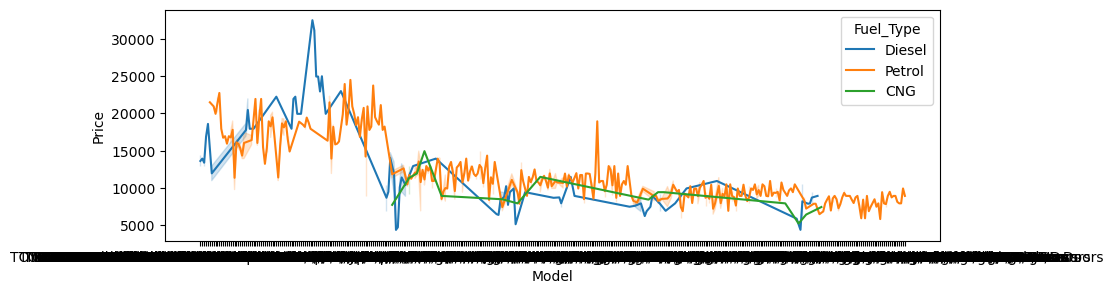

In [7]:
plt.figure(figsize=(10,3))
ax = sns.lineplot(x = 'Model',y = 'Price', hue = 'Fuel_Type',data = df1)
print(ax)
plt.savefig("Model by Price")
plt.show()

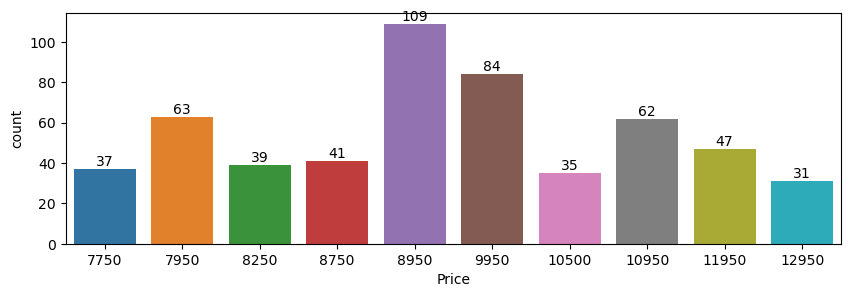

In [8]:
plt.figure(figsize=(10,3))
top = df1['Price'].value_counts(ascending=False).head(10)
ax = sns.countplot( x = 'Price',data = df1[df1['Price'].isin(top.index)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Top_10_Price")
plt.show()

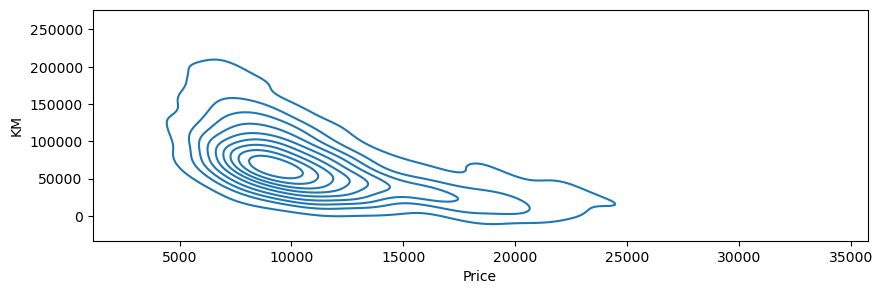

In [9]:
plt.figure(figsize=(10,3))
sns.kdeplot( x = 'Price',y = 'KM',data = df1)
plt.savefig("KM by Price")
plt.show()

In [10]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

1.7038849799952995
count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64


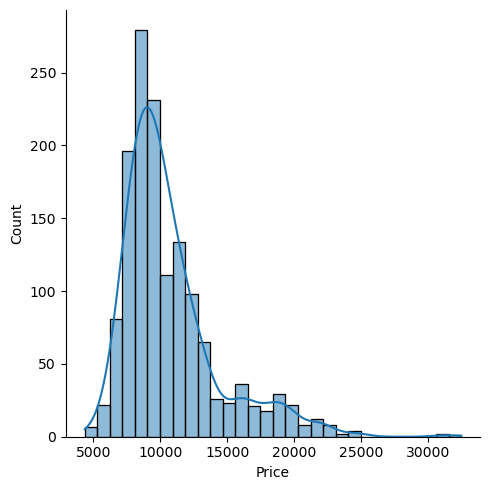

In [11]:
sns.displot(x = df1['Price'],bins = 30,kde = True)
print(df1['Price'].skew())
print(df1['Price'].describe())

<Axes: xlabel='Price'>

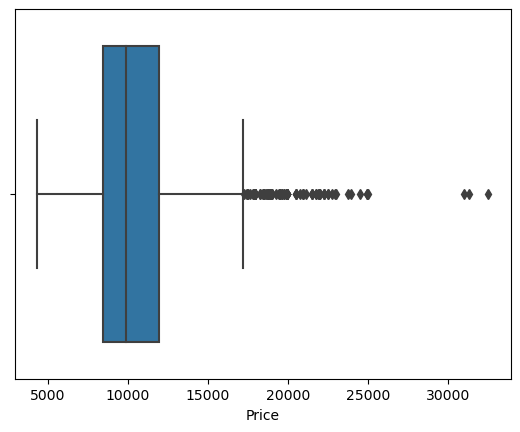

In [12]:
sns.boxplot(x = df1['Price'])

In [13]:
Q1 = df1['Price'] .quantile(0.25)
Q1

8450.0

In [14]:
Q3 = df1['Price'].quantile(0.75)
Q3

11950.0

In [15]:
IQR = Q3 - Q1
IQR

3500.0

In [16]:
upper = Q3 + (1.5 * IQR)
upper

17200.0

In [17]:
lower = Q1 - (1.5 * IQR)
lower

3200.0

In [18]:
df1[df1["Price"] >= 17200]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
10,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,1,0,0,0,0,1,0,0
11,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,11,2002,43610,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
12,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,184,TOYOTA Corolla 1.4 16V 5DR TERRA 4/5-Doors,21125,2,7,2004,225,Petrol,97,1,...,1,1,1,0,0,1,1,1,0,0
183,185,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,21500,2,7,2004,15,Petrol,110,1,...,1,1,1,0,1,1,1,0,0,0
184,186,TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...,17795,1,8,2004,1,Petrol,98,1,...,1,1,1,0,0,0,0,0,0,0
185,187,TOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfo...,18245,1,8,2004,1,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [19]:
df1['Price'] = np.where(df1['Price']>17200,17200,df1['Price'])

<Axes: xlabel='Price'>

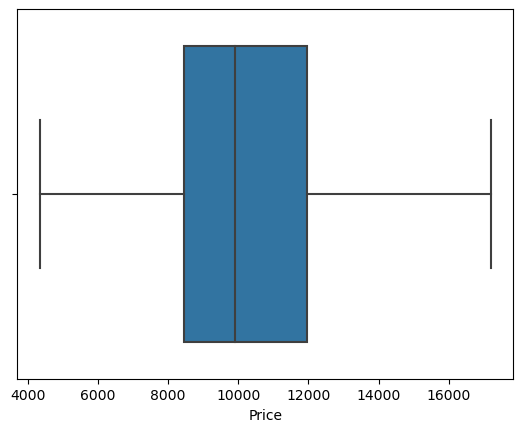

In [20]:
sns.boxplot(x = df1["Price"])

In [21]:
df1.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,17200,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,17200,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [22]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

<Axes: xlabel='KM', ylabel='Price'>

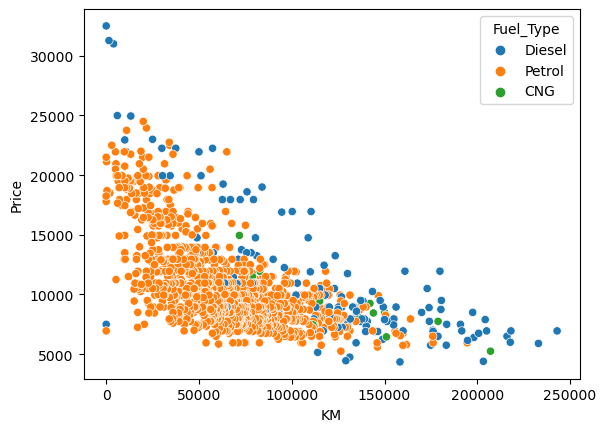

In [23]:
sns.scatterplot(x = 'KM', y = 'Price' ,hue = 'Fuel_Type',data = df)

<Axes: xlabel='KM', ylabel='Price'>

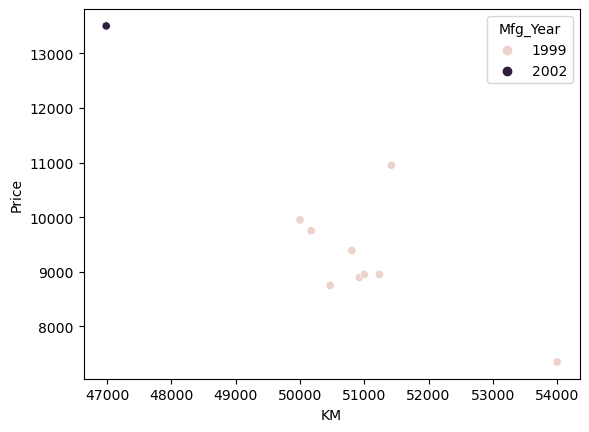

In [24]:
sns.scatterplot(x = 'KM', y = 'Price' ,hue = 'Mfg_Year',data = df1.value_counts(ascending=False).head(10))

In [25]:
df1.shape

(1436, 38)

<Axes: >

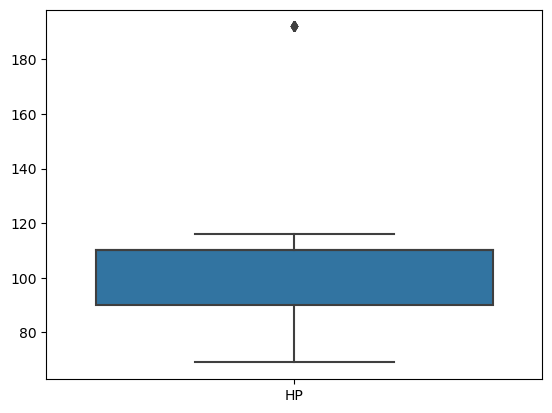

In [26]:
sns.boxplot(df1[["HP"]])

In [27]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [28]:
df1.shape

(1436, 38)

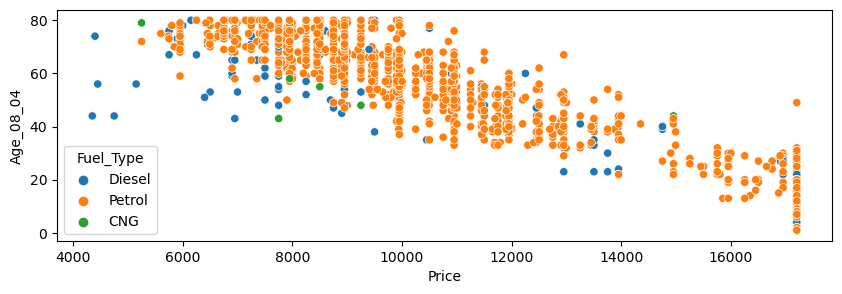

In [29]:
plt.figure(figsize=(10,3))
sns.scatterplot(x = 'Price', y = 'Age_08_04', data = df1,hue = 'Fuel_Type')
plt.savefig("Age by Price")

0.9180245109693088
count     1436.000000
mean     10500.633008
std       2981.813672
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      17200.000000
Name: Price, dtype: float64


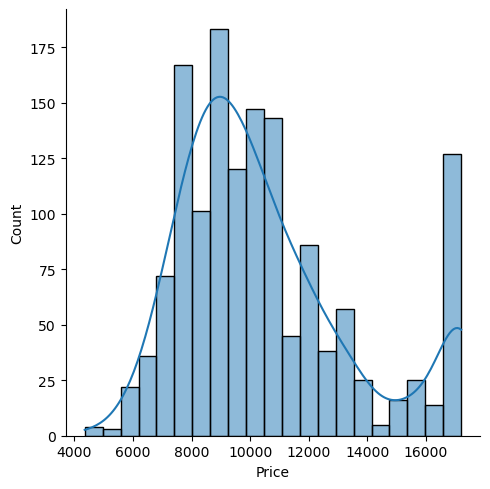

In [30]:
sns.displot(x = df1['Price'],kde=True)
print(df1['Price'].skew())
print(df1['Price'].describe())

-0.82670187309842
count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age_08_04, dtype: float64


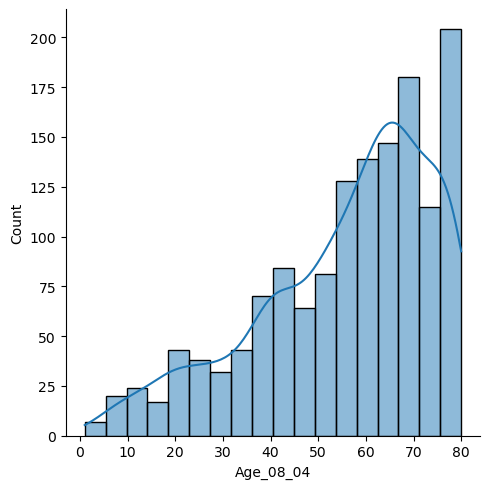

In [31]:
sns.displot(df1['Age_08_04'],kde = True)
print(df1['Age_08_04'].skew())
print(df1['Age_08_04'].describe())

<Axes: >

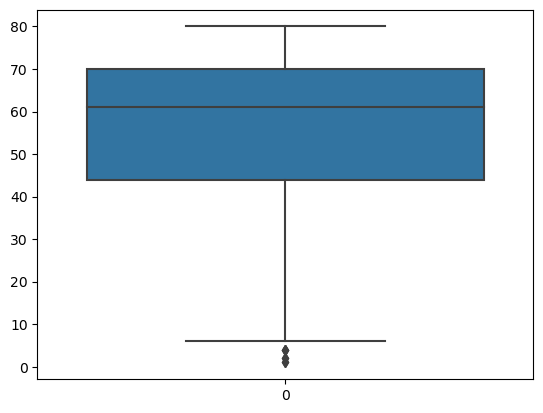

In [32]:
sns.boxplot(df1['Age_08_04'])

In [33]:
Q1 = df1['Age_08_04'] .quantile(0.25)
Q1

44.0

In [34]:
Q3 = df1['Age_08_04'] .quantile(0.75)
Q3

70.0

In [35]:
IQR = Q3 - Q1
IQR

26.0

In [36]:
lower = Q1 - (1.5 * IQR)
lower

5.0

In [37]:
df1[df1['Age_08_04'] <= 5]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
109,111,TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV,17200,4,5,2004,1,Diesel,116,0,...,1,1,1,0,1,1,1,0,0,0
110,112,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,17200,4,5,2004,4000,Diesel,116,1,...,1,1,1,0,1,1,1,1,0,0
111,113,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,17200,4,5,2004,1500,Diesel,116,1,...,1,1,1,0,1,1,1,0,0,0
182,184,TOYOTA Corolla 1.4 16V 5DR TERRA 4/5-Doors,17200,2,7,2004,225,Petrol,97,1,...,1,1,1,0,0,1,1,1,0,0
183,185,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,17200,2,7,2004,15,Petrol,110,1,...,1,1,1,0,1,1,1,0,0,0
184,186,TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...,17200,1,8,2004,1,Petrol,98,1,...,1,1,1,0,0,0,0,0,0,0
185,187,TOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfo...,17200,1,8,2004,1,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [38]:
upper = Q3 + (1.5 * IQR)
upper

109.0

In [39]:
df1['Age_08_04'] = np.where(df1['Age_08_04']<5,5,df1['Age_08_04'])

In [40]:
df1['Age_08_04']

0       23
1       23
2       24
3       26
4       30
        ..
1431    69
1432    72
1433    71
1434    70
1435    76
Name: Age_08_04, Length: 1436, dtype: int64

<Axes: >

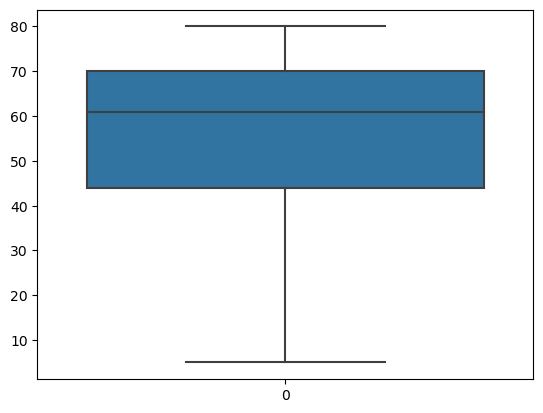

In [41]:
sns.boxplot(df1['Age_08_04'])

In [42]:
df1[['Price','Age_08_04']].var()

Price        8.891213e+06
Age_08_04    3.447154e+02
dtype: float64

In [43]:
df1.shape

(1436, 38)

In [44]:
model_data = df1[['Price','Age_08_04']]
print(model_data)

      Price  Age_08_04
0     13500         23
1     13750         23
2     13950         24
3     14950         26
4     13750         30
...     ...        ...
1431   7500         69
1432  10845         72
1433   8500         71
1434   7250         70
1435   6950         76

[1436 rows x 2 columns]


In [45]:
model_data.corr()

,Price,Age_08_04
Price,1.000000,-0.895728
Age_08_04,-0.895728,1.000000


In [46]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split

### Method - 1

In [47]:
##### Splitting the data into train and test randomly
training, testing = train_test_split(model_data,train_size=0.8)

In [48]:
training.shape

(1148, 2)

In [49]:
testing.shape

(288, 2)

### Method -2 

In [50]:
X = model_data['Age_08_04']
y = model_data['Price']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [52]:
X_train.shape, y_train.shape

((1148,), (1148,))

In [53]:
X_test.shape, y_test.shape

((288,), (288,))

In [54]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [57]:
model_fit.coef_

array([[-144.23020648]])

In [58]:
model_fit.intercept_

array([18540.63406297])

In [59]:
X_test = X_test.values.reshape(-1,1)

In [60]:
pred = model_fit.predict(X_test)
pred

array([[ 7723.36857668],
       [11761.81435823],
       [ 7002.21754426],
       [15656.02993329],
       [10319.51229339],
       [ 7723.36857668],
       [ 9309.900848  ],
       [13781.037249  ],
       [ 7290.67795723],
       [ 8156.05919613],
       [ 9598.36126097],
       [12915.6560101 ],
       [17675.25282406],
       [ 9454.13105449],
       [10463.74249987],
       [10319.51229339],
       [ 8732.98002207],
       [10752.20291284],
       [ 7579.1383702 ],
       [11329.12373878],
       [ 8588.74981558],
       [ 9742.59146745],
       [ 7290.67795723],
       [ 9742.59146745],
       [ 7146.44775074],
       [17819.48303055],
       [ 7290.67795723],
       [15367.56952032],
       [10752.20291284],
       [ 9742.59146745],
       [17531.02261758],
       [13059.88621658],
       [ 9165.67064152],
       [11329.12373878],
       [ 9742.59146745],
       [10031.05188042],
       [ 9165.67064152],
       [ 9165.67064152],
       [11329.12373878],
       [ 7146.44775074],


In [61]:
df_pred = pd.DataFrame(pred,columns = ['Pred'])

In [62]:
df_pred['Actual'] = y_test.values

In [63]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

In [64]:
print("The Strength of the model is -",r2_score(df_pred['Actual'],df_pred['Pred']))

The Strength of the model is - 0.8489334717637971


In [65]:
sqrt(mean_squared_error(df_pred['Actual'],df_pred['Pred']))

1149.9984260064248

In [66]:
df_pred['Actual'],df_pred['Pred']

(0       7900
 1      12450
 2       9500
 3      16450
 4       9750
        ...  
 283     8950
 284    10500
 285     9950
 286     8500
 287    17200
 Name: Actual, Length: 288, dtype: int64,
 0       7723.368577
 1      11761.814358
 2       7002.217544
 3      15656.029933
 4      10319.512293
            ...     
 283     9165.670642
 284    11040.663326
 285     9598.361261
 286    10175.282087
 287    17819.483031
 Name: Pred, Length: 288, dtype: float64)

1.0159121980877577
count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: KM, dtype: float64


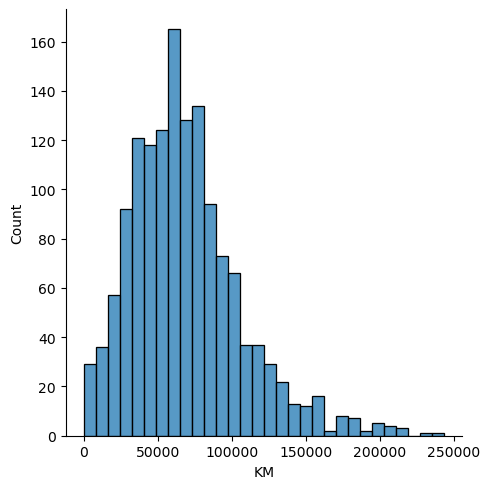

In [67]:
sns.displot(df['KM'],bins = 30)
print(df['KM'].skew())
print(df['KM'].describe())

<Axes: >

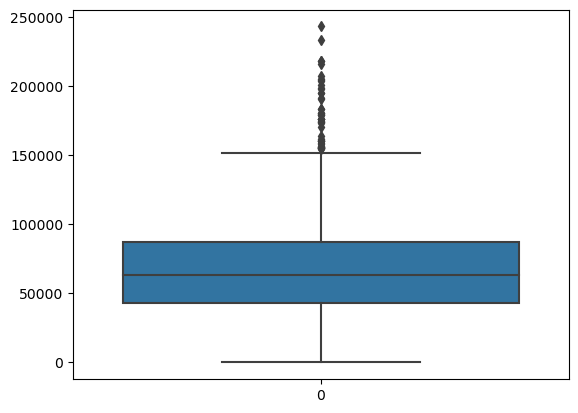

In [68]:
sns.boxplot(df['KM'])

In [69]:
Q1 = df['KM'].quantile(0.25)
Q1

43000.0

In [70]:
Q3 = df['KM'].quantile(0.75)
Q3

87020.75

In [71]:
IQR = Q3 - Q1
IQR

44020.75

In [72]:
lower = Q1 - (1.5 * IQR)
lower

-23031.125

In [73]:
upper = Q3 + (1.5 *IQR)
upper

153051.875

In [74]:
df[df['KM'] >= 153051.875].notna().sum()

Id                  49
Model               49
Price               49
Age_08_04           49
Mfg_Month           49
Mfg_Year            49
KM                  49
Fuel_Type           49
HP                  49
Met_Color           49
Color               49
Automatic           49
cc                  49
Doors               49
Cylinders           49
Gears               49
Quarterly_Tax       49
Weight              49
Mfr_Guarantee       49
BOVAG_Guarantee     49
Guarantee_Period    49
ABS                 49
Airbag_1            49
Airbag_2            49
Airco               49
Automatic_airco     49
Boardcomputer       49
CD_Player           49
Central_Lock        49
Powered_Windows     49
Power_Steering      49
Radio               49
Mistlamps           49
Sport_Model         49
Backseat_Divider    49
Metallic_Rim        49
Radio_cassette      49
Tow_Bar             49
dtype: int64

In [75]:
# df['KM'] = np.where(df['KM']>153051.875,153051.875,df['KM'])

In [76]:
df['KM']

0       46986
1       72937
2       41711
3       48000
4       38500
        ...  
1431    20544
1432    19000
1433    17016
1434    16916
1435        1
Name: KM, Length: 1436, dtype: int64

<Axes: >

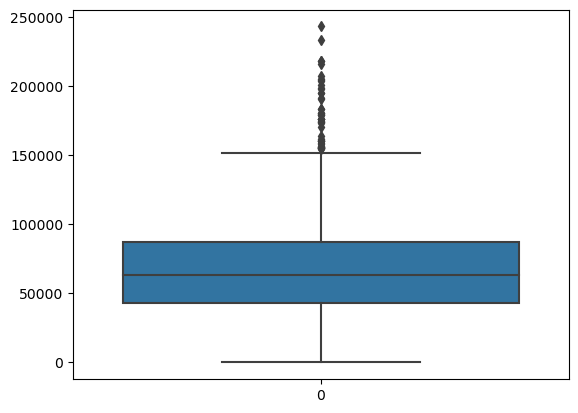

In [77]:
sns.boxplot(df['KM'])

1.0159121980877577
count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: KM, dtype: float64


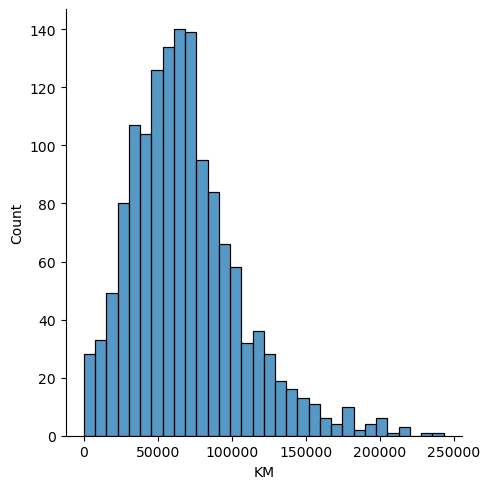

In [78]:
sns.displot(df['KM'])
print(df['KM'].skew())
print(df['KM'].describe())

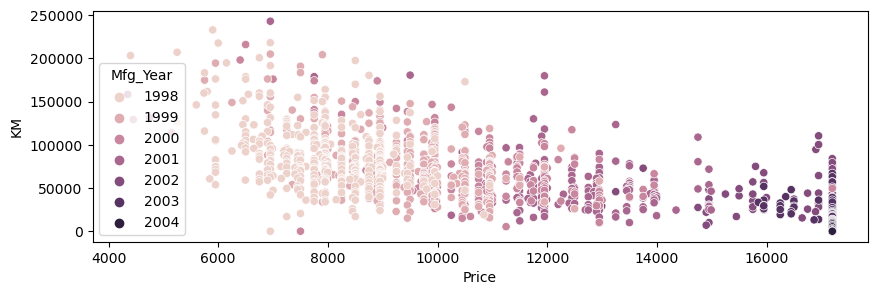

In [79]:
plt.figure(figsize=(10,3))
sns.scatterplot(x = 'Price', y = 'KM', data = df1,hue = 'Mfg_Year')
plt.savefig("KM by Price")

In [80]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

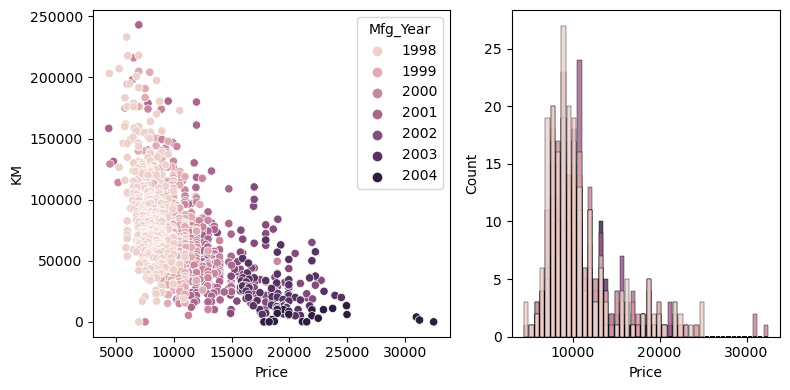

In [81]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="Price", y="KM", hue="Mfg_Year", ax=axs[0])
sns.histplot(data=df, x="Price", hue="Mfg_Month", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()
plt.savefig("KM1 by Price")

In [82]:
df[['Price','KM']].var()

Price    1.315487e+07
KM       1.406734e+09
dtype: float64

In [83]:
model_data = df1[['Price','KM']]
print(model_data)

      Price     KM
0     13500  46986
1     13750  72937
2     13950  41711
3     14950  48000
4     13750  38500
...     ...    ...
1431   7500  20544
1432  10845  19000
1433   8500  17016
1434   7250  16916
1435   6950      1

[1436 rows x 2 columns]


In [84]:
model_data.corr()

,Price,KM
Price,1.000000,-0.593367
KM,-0.593367,1.000000


In [85]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split

In [86]:
X = model_data['KM']
y = model_data['Price']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state= 123)

In [88]:
X_train.shape,y_train.shape

((861,), (861,))

In [89]:
X_test.shape,y_test.shape

((575,), (575,))

In [90]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [91]:
from sklearn.linear_model import LinearRegression
from math import sqrt

In [92]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [93]:
model_fit.coef_

array([[-0.04649147]])

In [94]:
model_fit.intercept_

array([13668.87061922])

In [95]:
X_test = X_test.values.reshape(-1,1)

In [96]:
pred = model_fit.predict(X_test)
pred

array([[12288.7249665 ],
       [11940.45739645],
       [11010.5350982 ],
       [ 7376.85511689],
       [12506.58397508],
       [10656.363112  ],
       [ 9295.00001145],
       [12460.09250931],
       [ 7199.81561526],
       [12480.40927985],
       [ 9486.8237992 ],
       [ 9620.25430595],
       [13668.82412775],
       [10664.12718678],
       [12297.37237913],
       [10639.02179527],
       [10767.9891213 ],
       [ 8576.19545925],
       [ 9468.59914462],
       [10098.74447161],
       [10221.48194123],
       [11948.68638589],
       [11093.2434158 ],
       [12134.65224895],
       [10851.48779382],
       [11485.5848954 ],
       [10600.99177627],
       [11303.71028132],
       [ 6234.51331157],
       [12032.41751573],
       [12283.5644138 ],
       [ 9475.34040716],
       [12946.62569855],
       [ 7127.52138599],
       [11669.73759129],
       [11394.13618224],
       [10646.64639566],
       [11467.49971521],
       [ 9484.63870031],
       [11483.12084771],


In [97]:
df_pred = pd.DataFrame(pred,columns = ['KM Pred price'])

In [98]:
df_pred['Actual'] = y_test.values

In [99]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [100]:
print("The strongest value of R is",r2_score(df_pred['Actual'],df_pred['KM Pred price']))

The strongest value of R is 0.3475711737229994


In [101]:
sqrt(mean_squared_error(df_pred['Actual'],df_pred['KM Pred price']))

2465.9190993009006

In [102]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

<Axes: >

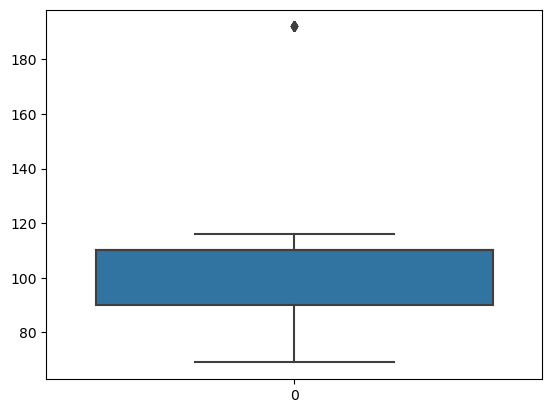

In [103]:
sns.boxplot(df['HP'])

In [104]:
df[df['HP'] > 110]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
10,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,1,0,0,0,0,1,0,0
11,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,11,2002,43610,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
12,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
13,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
14,15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22500,32,1,2002,34131,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
15,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
16,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,3,2002,34000,Petrol,192,1,...,1,1,1,0,1,0,1,1,0,0
49,50,TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-D...,21950,31,2,2002,64982,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
53,54,TOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors,21950,27,6,2002,49866,Petrol,192,1,...,1,1,1,1,0,0,0,1,1,0


In [105]:
Q1 = df['HP'] .quantile(0.25)
Q1

90.0

In [106]:
Q3 = df['HP'] . quantile(0.75)
Q3

110.0

In [107]:
IQR = Q3 - Q1

In [108]:
lower = Q1 - (IQR * 1.5)
lower

60.0

In [109]:
upper = Q3 + (IQR * 1.5)
upper

140.0

In [110]:
df[df['HP'] > 140]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
10,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,1,0,0,0,0,1,0,0
11,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,11,2002,43610,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
12,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
13,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
14,15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22500,32,1,2002,34131,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
15,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
16,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,3,2002,34000,Petrol,192,1,...,1,1,1,0,1,0,1,1,0,0
49,50,TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-D...,21950,31,2,2002,64982,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
53,54,TOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors,21950,27,6,2002,49866,Petrol,192,1,...,1,1,1,1,0,0,0,1,1,0


In [111]:
# #### np.where
df['HP'] = np.where(df['HP']>=140,140,df['HP'])
df['HP']

0        90
1        90
2        90
3        90
4        90
       ... 
1431     86
1432     86
1433     86
1434     86
1435    110
Name: HP, Length: 1436, dtype: int64

In [112]:
df[df['HP'] == 140].count()

Id                  11
Model               11
Price               11
Age_08_04           11
Mfg_Month           11
Mfg_Year            11
KM                  11
Fuel_Type           11
HP                  11
Met_Color           11
Color               11
Automatic           11
cc                  11
Doors               11
Cylinders           11
Gears               11
Quarterly_Tax       11
Weight              11
Mfr_Guarantee       11
BOVAG_Guarantee     11
Guarantee_Period    11
ABS                 11
Airbag_1            11
Airbag_2            11
Airco               11
Automatic_airco     11
Boardcomputer       11
CD_Player           11
Central_Lock        11
Powered_Windows     11
Power_Steering      11
Radio               11
Mistlamps           11
Sport_Model         11
Backseat_Divider    11
Metallic_Rim        11
Radio_cassette      11
Tow_Bar             11
dtype: int64

In [113]:
df['HP'].fillna

<bound method Series.fillna of 0        90
1        90
2        90
3        90
4        90
       ... 
1431     86
1432     86
1433     86
1434     86
1435    110
Name: HP, Length: 1436, dtype: int64>

In [114]:
df[['HP','Price']].var()

HP       1.728554e+02
Price    1.315487e+07
dtype: float64

In [115]:
model_data = df[['HP','Price']]
print(model_data)

       HP  Price
0      90  13500
1      90  13750
2      90  13950
3      90  14950
4      90  13750
...   ...    ...
1431   86   7500
1432   86  10845
1433   86   8500
1434   86   7250
1435  110   6950

[1436 rows x 2 columns]


In [116]:
df[df['HP'] ==140].count()

Id                  11
Model               11
Price               11
Age_08_04           11
Mfg_Month           11
Mfg_Year            11
KM                  11
Fuel_Type           11
HP                  11
Met_Color           11
Color               11
Automatic           11
cc                  11
Doors               11
Cylinders           11
Gears               11
Quarterly_Tax       11
Weight              11
Mfr_Guarantee       11
BOVAG_Guarantee     11
Guarantee_Period    11
ABS                 11
Airbag_1            11
Airbag_2            11
Airco               11
Automatic_airco     11
Boardcomputer       11
CD_Player           11
Central_Lock        11
Powered_Windows     11
Power_Steering      11
Radio               11
Mistlamps           11
Sport_Model         11
Backseat_Divider    11
Metallic_Rim        11
Radio_cassette      11
Tow_Bar             11
dtype: int64

In [117]:
model_data.corr()

,HP,Price
HP,1.000000,0.267304
Price,0.267304,1.000000


In [118]:
#### sampleing the data
from sklearn.model_selection import train_test_split

In [119]:
X = model_data['HP']
y = model_data['Price']

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=123)

In [121]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [122]:
from sklearn.linear_model import LinearRegression
from math import sqrt

In [123]:
model_fit.coef_

array([[-0.04649147]])

In [124]:
model_fit.intercept_

array([13668.87061922])

In [125]:
X_test = X_test.values.reshape(-1,1)

In [126]:
pred = model_fit.predict(X_test)
print(pred)

[[13663.75655798]
 [13663.75655798]
 [13663.75655798]
 [13663.75655798]
 [13664.36094704]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13665.47674222]
 [13663.75655798]
 [13663.75655798]
 [13663.75655798]
 [13664.31445557]
 [13663.75655798]
 [13663.75655798]
 [13664.36094704]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13664.36094704]
 [13663.75655798]
 [13663.75655798]
 [13663.75655798]
 [13664.36094704]
 [13664.36094704]
 [13664.36094704]
 [13664.87235316]
 [13665.66270808]
 [13664.36094704]
 [13665.66270808]
 [13664.87235316]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13664.87235316]
 [13663.75655798]
 [13665.52323368]
 [13664.87235316]
 [13663.75655798]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13663.75655798]
 [13663.75655798]
 [13665.52323368]
 [13663.75655798]
 [13663.75655798]
 [13663.75655798]
 [13664.87235316]
 [13663.75

In [127]:
df_pred = pd.DataFrame(pred,columns=['HP pred Price'])

In [128]:
df_pred["Actual"] = y_test.values

In [129]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [130]:
print("The Strength of the Model is - ",r2_score(df_pred['Actual'],df_pred['HP pred Price']))

The Strength of the Model is -  -0.7775074702282665


<Axes: xlabel='cc'>

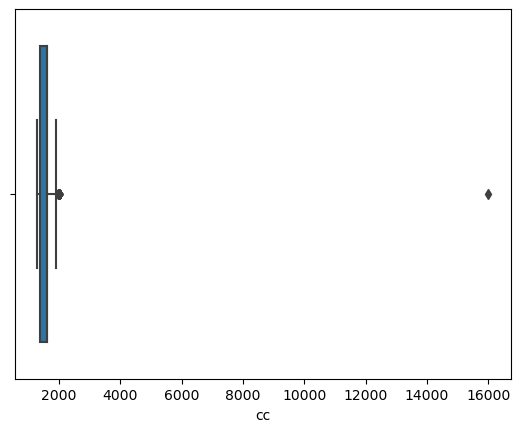

In [131]:
sns.boxplot(x = df['cc'])

In [132]:
Q1 = df['cc'] .quantile(0.25)
Q1

1400.0

In [133]:
Q3 = df['cc'] .quantile(0.75)
Q3

1600.0

In [134]:
IQR = Q3 - Q1
IQR

200.0

In [135]:
lower = Q1 - (IQR * 1.5)
lower

1100.0

In [136]:
upper = Q3 + (IQR * 1.5)
upper

1900.0

In [137]:
df[df['cc'] > 1900].count()

Id                  123
Model               123
Price               123
Age_08_04           123
Mfg_Month           123
Mfg_Year            123
KM                  123
Fuel_Type           123
HP                  123
Met_Color           123
Color               123
Automatic           123
cc                  123
Doors               123
Cylinders           123
Gears               123
Quarterly_Tax       123
Weight              123
Mfr_Guarantee       123
BOVAG_Guarantee     123
Guarantee_Period    123
ABS                 123
Airbag_1            123
Airbag_2            123
Airco               123
Automatic_airco     123
Boardcomputer       123
CD_Player           123
Central_Lock        123
Powered_Windows     123
Power_Steering      123
Radio               123
Mistlamps           123
Sport_Model         123
Backseat_Divider    123
Metallic_Rim        123
Radio_cassette      123
Tow_Bar             123
dtype: int64

In [138]:
##### np.where
df['cc'] = np.where(df['cc']>=1900,1600,df['cc'])

In [139]:
df['cc'].value_counts()

1600    998
1300    248
1400    164
1800     14
1598      4
1587      4
1398      2
1332      2
Name: cc, dtype: int64

In [140]:
print(df[['cc','Price']].var())

cc       1.528207e+04
Price    1.315487e+07
dtype: float64


-0.9435387041946857
count    1436.000000
mean     1526.601671
std       123.620652
min      1300.000000
25%      1400.000000
50%      1600.000000
75%      1600.000000
max      1800.000000
Name: cc, dtype: float64


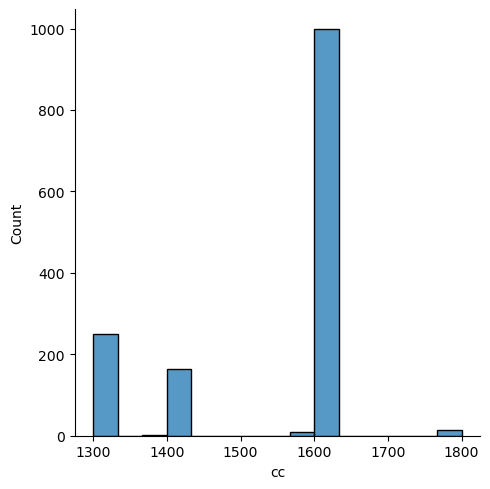

In [141]:
sns.displot(x = df['cc'])
print(df['cc'].skew())
print(df['cc'].describe())

In [142]:
model_data = df[['cc','Price']]
print(model_data)

        cc  Price
0     1600  13500
1     1600  13750
2     1600  13950
3     1600  14950
4     1600  13750
...    ...    ...
1431  1300   7500
1432  1300  10845
1433  1300   8500
1434  1300   7250
1435  1600   6950

[1436 rows x 2 columns]


In [143]:
model_data.corr()

,cc,Price
cc,1.00000,0.18293
Price,0.18293,1.00000


In [144]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split

In [145]:
X = model_data['cc']
y = model_data['Price']

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=123)

In [147]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [148]:
from sklearn.linear_model import LinearRegression
from math import sqrt

In [149]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [150]:
model_fit.coef_

array([[4.7638552]])

In [151]:
model_fit.intercept_

array([3431.70053354])

In [152]:
X_test = X_test.values.reshape(-1,1)

In [153]:
pred = model_fit.predict(X_test)
pred

array([[11053.86885434],
       [11053.86885434],
       [11053.86885434],
       [11053.86885434],
       [10101.09781424],
       [11053.86885434],
       [11053.86885434],
       [ 9624.71229419],
       [11053.86885434],
       [11053.86885434],
       [11053.86885434],
       [11053.86885434],
       [10101.09781424],
       [11053.86885434],
       [11053.86885434],
       [10101.09781424],
       [11053.86885434],
       [11053.86885434],
       [ 9624.71229419],
       [11053.86885434],
       [11053.86885434],
       [ 9624.71229419],
       [11053.86885434],
       [11053.86885434],
       [ 9624.71229419],
       [10101.09781424],
       [11053.86885434],
       [11053.86885434],
       [11053.86885434],
       [10101.09781424],
       [10101.09781424],
       [10101.09781424],
       [ 9624.71229419],
       [11053.86885434],
       [10101.09781424],
       [11053.86885434],
       [ 9624.71229419],
       [11053.86885434],
       [11053.86885434],
       [ 9624.71229419],


In [154]:
df_pred = pd.DataFrame(pred,columns = ['cc Pred Price'])

In [155]:
df_pred['Actual'] = y_test.values

In [156]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [157]:
r2_score(df_pred['Actual'],df_pred['cc Pred Price'])

0.05727660205234131

In [158]:
df['cc'].mode()

0    1600
Name: cc, dtype: int64

In [159]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

<Axes: >

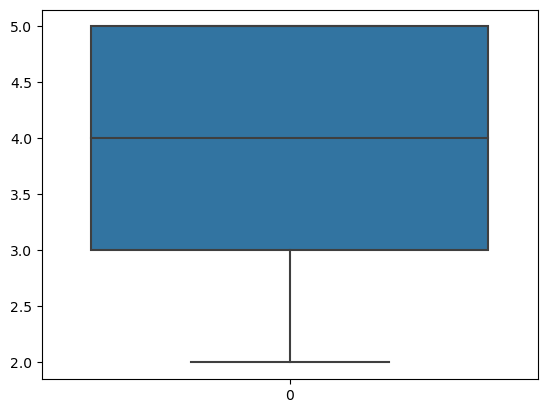

In [160]:
sns.boxplot(df['Doors'])

In [161]:
X = df['Doors']
y = df['Price']

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=12345)

In [164]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [167]:
model.coef_

array([[785.73248355]])

In [168]:
model.intercept_

array([7505.01784539])

In [169]:
X_test_predict = X_test.values.reshape(-1,1)

In [170]:
pred = model_fit.predict(X_test_predict)
pred

array([[ 9862.21529605],
       [11433.68026316],
       [10647.94777961],
       ...,
       [11433.68026316],
       [11433.68026316],
       [ 9862.21529605]])

In [171]:
df_pred = pd.DataFrame(pred,columns=['Pred'])

In [172]:
df_pred['Actual'] = y_test.values

In [173]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [174]:
print("The strong value of r2 is -",r2_score(df_pred['Actual'],df_pred['Pred']))

The strong value of r2 is - 0.031424004691443796


<Axes: xlabel='Gears'>

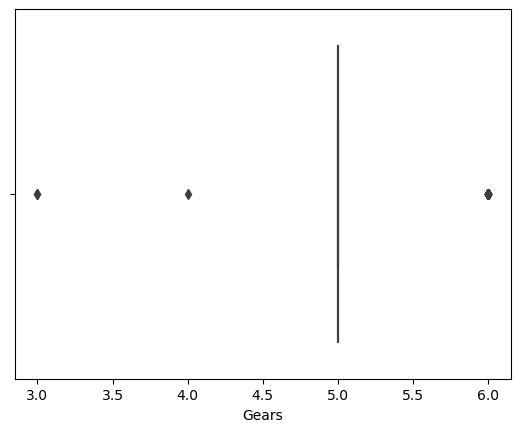

In [175]:
sns.boxplot(x = df['Gears'])

In [176]:
df['Gears'] = np.where(df['Gears'] > 5,5,df['Gears'])

In [177]:
df['Gears'] = np.where(df['Gears'] < 5,5,df['Gears'])

In [178]:
Q1 = df['Gears'].quantile(0.25)
Q1

5.0

In [179]:
Q3 = df['Gears'].quantile(0.75)
Q3

5.0

In [180]:
IQR = Q3 - Q1
IQR

0.0

In [181]:
X = df['Gears']
y = df['Price']

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1234)

In [184]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [187]:
model.coef_

array([[0.]])

In [188]:
model.intercept_

array([10730.8189415])

In [189]:
X_test_predict = X_test.values.reshape(-1,1)

In [190]:
pred = model.predict(X_test_predict)
pred

array([[10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.8189415],
       [10730.81

In [191]:
df_pred = pd.DataFrame(pred,columns=['Pred'])

In [192]:
df_pred['Actual'] = y_test.values

In [193]:
print("The strong value of r2 is -",r2_score(df_pred['Actual'],df_pred['Pred']))

The strong value of r2 is - -3.7092329208121555e-11


In [194]:
X = df['Quarterly_Tax']
y = df['Price']

In [195]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1234)
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [196]:
from sklearn.linear_model import LinearRegression
X_train,y_train

(array([[69],
        [69],
        [69],
        ...,
        [85],
        [69],
        [69]], dtype=int64),
 array([[9950],
        [7750],
        [5950],
        ...,
        [8500],
        [7950],
        [9450]], dtype=int64))

In [197]:
model = LinearRegression()

In [198]:
model_fit = model.fit(X_train,y_train)
model.coef_

array([[18.41934202]])

In [199]:
model.intercept_

array([9124.30000698])

In [200]:
X_test_predict = X_test.values.reshape(-1,1)
pred = model.predict(X_test_predict)
pred

array([[12531.87828036],
       [10689.94407853],
       [10689.94407853],
       [14336.97379815],
       [12531.87828036],
       [10689.94407853],
       [10395.23460624],
       [10395.23460624],
       [10689.94407853],
       [12531.87828036],
       [10689.94407853],
       [10689.94407853],
       [10395.23460624],
       [10395.23460624],
       [10689.94407853],
       [10395.23460624],
       [10395.23460624],
       [10395.23460624],
       [10689.94407853],
       [10395.23460624],
       [10689.94407853],
       [10689.94407853],
       [ 9474.26750532],
       [10395.23460624],
       [10689.94407853],
       [ 9474.26750532],
       [10395.23460624],
       [12752.91038458],
       [10689.94407853],
       [ 9474.26750532],
       [10395.23460624],
       [10689.94407853],
       [10395.23460624],
       [10395.23460624],
       [10395.23460624],
       [12531.87828036],
       [10395.23460624],
       [10395.23460624],
       [10395.23460624],
       [10395.23460624],


In [201]:
df_pred = pd.DataFrame(pred,columns=['Pred'])

In [202]:
df_pred['Actual'] = y_test.values

In [203]:
print("The strong value of r2 is -",r2_score(df_pred['Actual'],df_pred['Pred']))

The strong value of r2 is - 0.06242413995981699


In [204]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

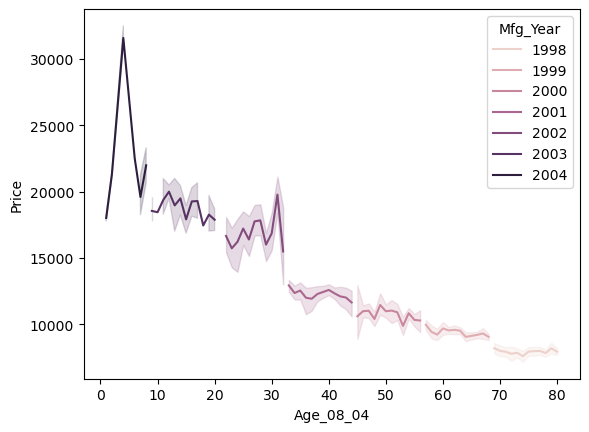

In [205]:
sns.lineplot(x = 'Age_08_04',y = 'Price',data =df,hue = 'Mfg_Year' )
plt.savefig("price by Age_08_04.png")

<Axes: xlabel='Age_08_04', ylabel='Price'>

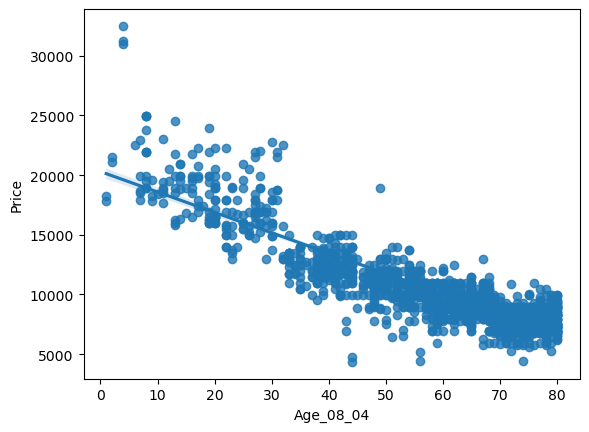

In [206]:
sns.regplot(x = 'Age_08_04',y = 'Price',data =df )

<Axes: xlabel='KM', ylabel='Price'>

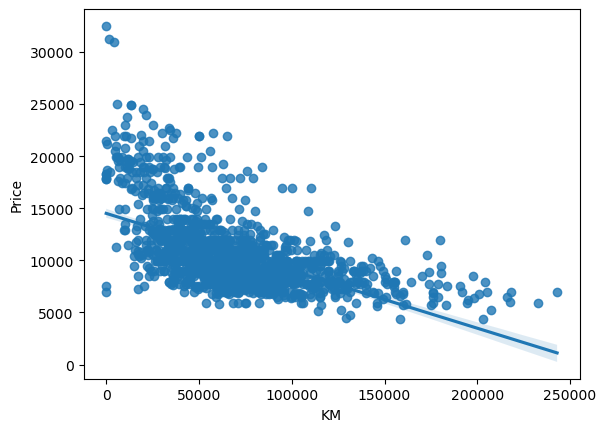

In [207]:
sns.regplot(x = 'KM',y = 'Price',data =df )

<Axes: xlabel='HP', ylabel='Price'>

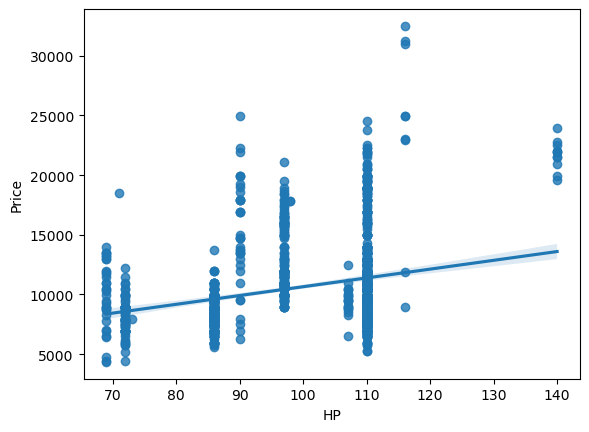

In [208]:
sns.regplot(x = 'HP',y = 'Price',data =df )

<Axes: xlabel='cc', ylabel='Price'>

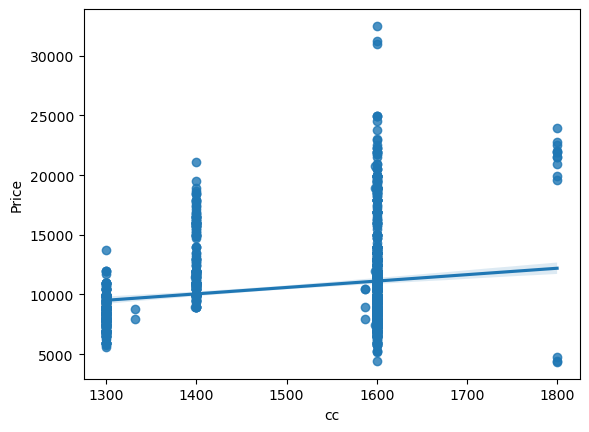

In [209]:
sns.regplot(x = 'cc',y = 'Price',data =df )

<Axes: xlabel='Doors', ylabel='Price'>

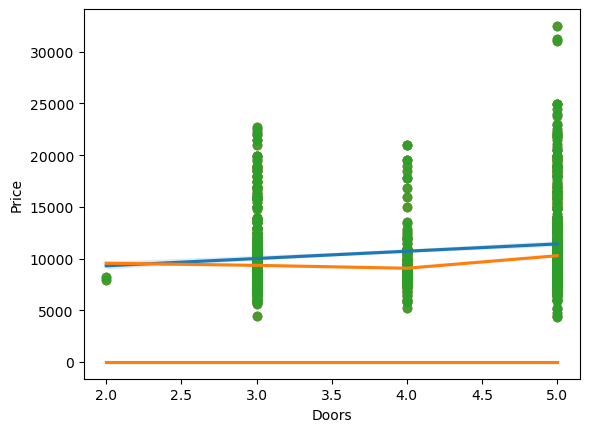

In [210]:
sns.regplot(x = 'Doors',y = 'Price',data =df )
sns.regplot(x = 'Doors',y = 'Price',data =df,logistic=True )
sns.regplot(x = 'Doors',y = 'Price',data =df,lowess=True, line_kws={"color": "C1"} )


<Axes: xlabel='Gears', ylabel='Price'>

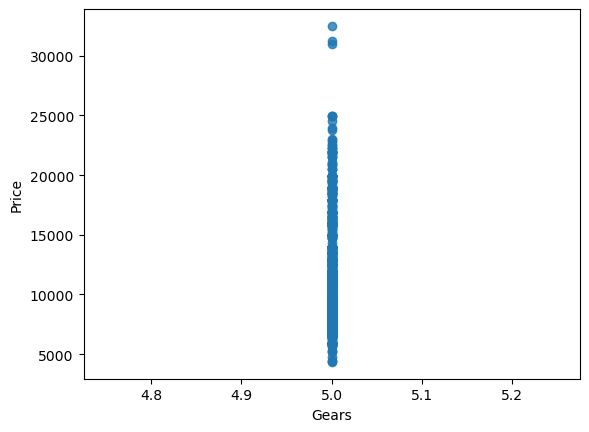

In [211]:
sns.regplot(x = 'Gears',y = 'Price',data =df )

<Axes: xlabel='Weight', ylabel='Price'>

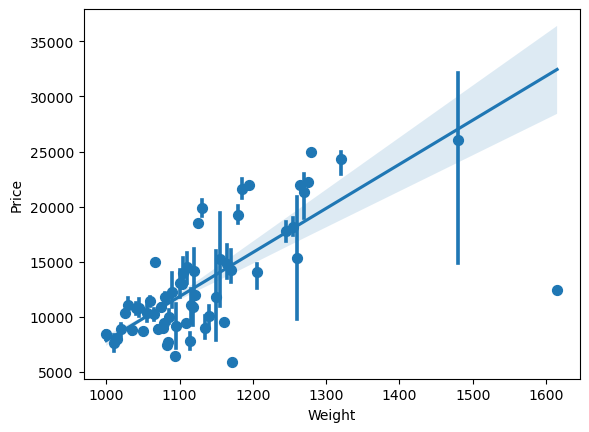

In [212]:
sns.regplot(x = 'Weight',y = 'Price',data =df,x_estimator=np.mean )

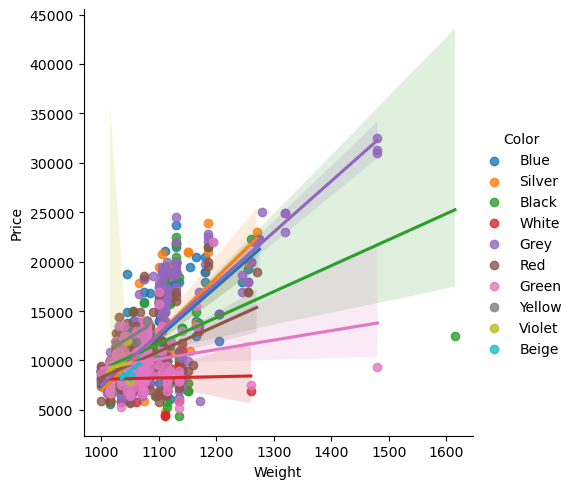

In [213]:
sns.lmplot(x = 'Weight',y = 'Price',data =df,hue = 'Color' )

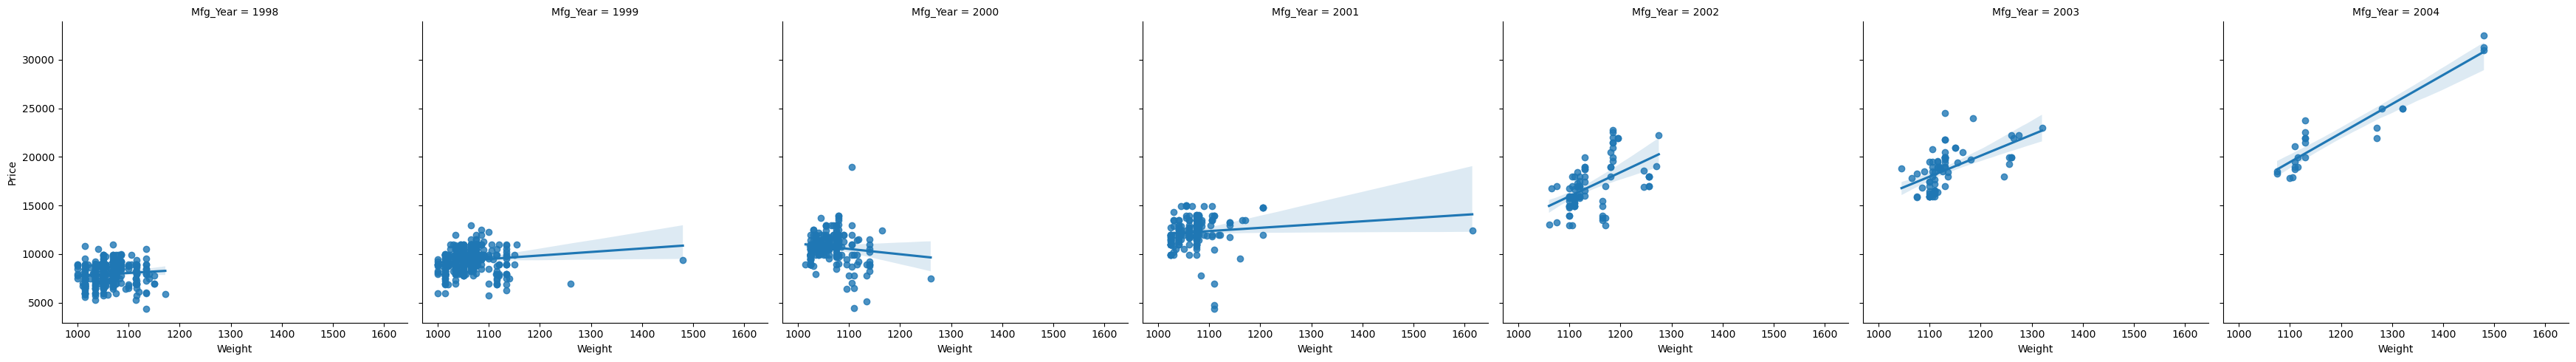

In [214]:
sns.lmplot(x = 'Weight',y = 'Price',data =df,col = 'Mfg_Year')

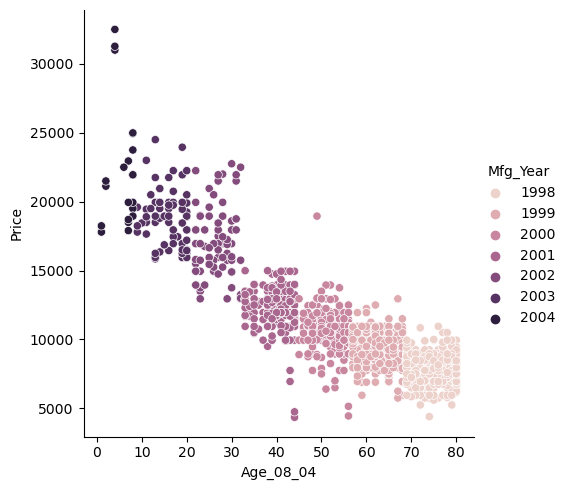

In [215]:
sns.relplot(
    data=df, x="Age_08_04", y="Price", hue="Mfg_Year",
)
plt.savefig("Price by Age.png")

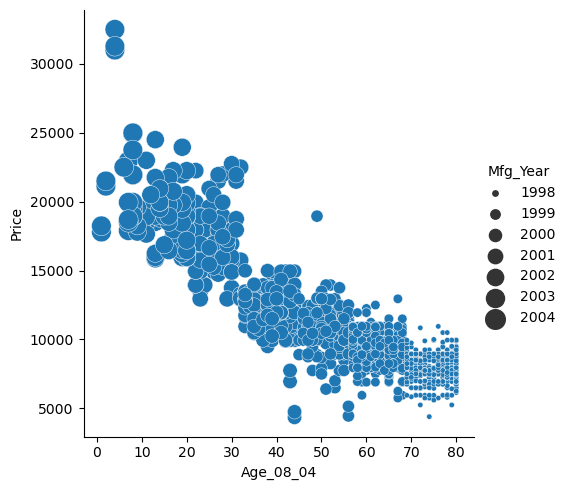

In [216]:
sns.relplot(
    data=df, x="Age_08_04", y="Price", size="Mfg_Year",sizes = (15,200)
)

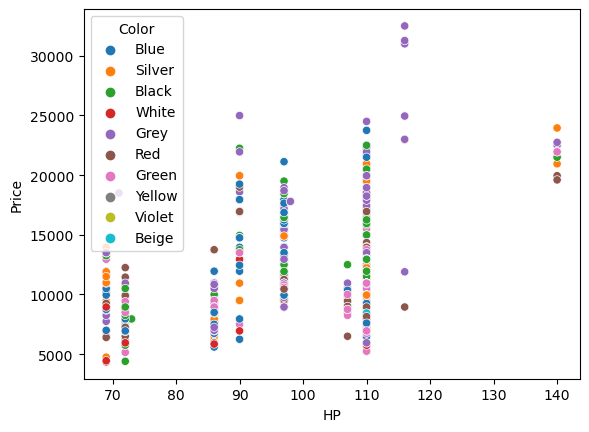

In [217]:
sns.scatterplot(x = 'HP', y = 'Price',data = df,hue = 'Color')
plt.savefig("Price by HP.png")

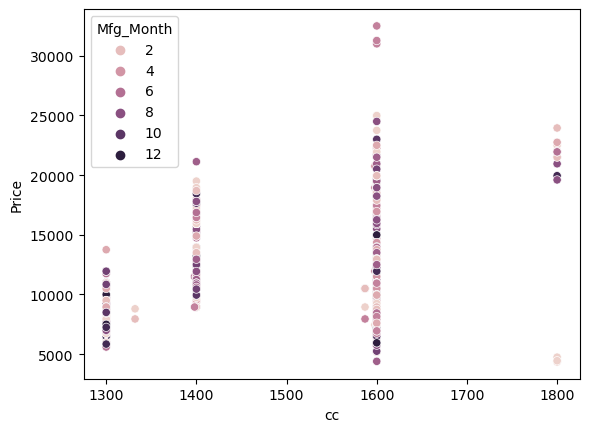

In [218]:
sns.scatterplot(x = 'cc', y = 'Price',data = df,hue = 'Mfg_Month')
plt.savefig("Price by cc.png")

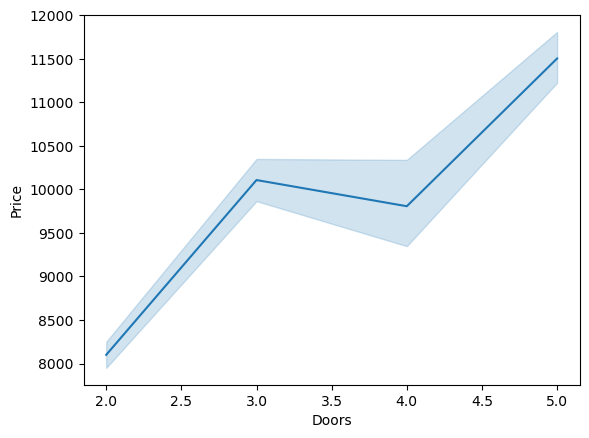

In [219]:
sns.lineplot(x = 'Doors', y = 'Price',data = df)
plt.savefig("Price by Doors.png")

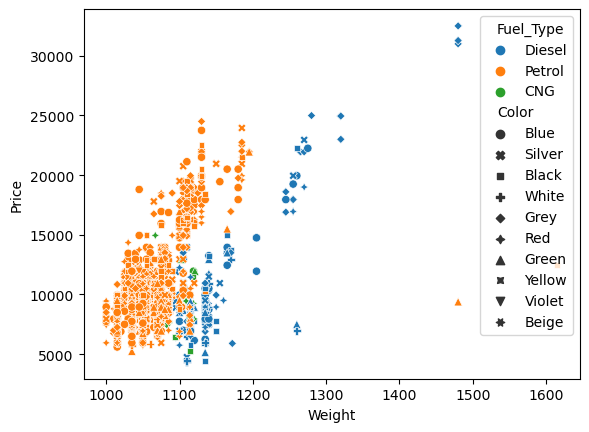

In [220]:
sns.scatterplot(x = 'Weight', y = 'Price',data = df,hue = 'Fuel_Type',style = 'Color')
plt.savefig("Price by weight.png")

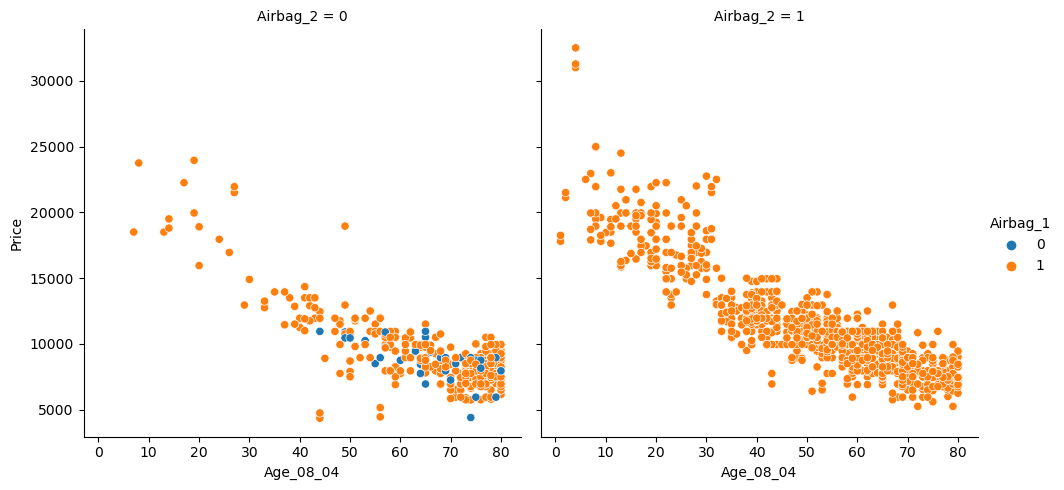

In [221]:
sns.relplot(x = 'Age_08_04', y = 'Price',data = df,hue = 'Airbag_1',col='Airbag_2')
plt.savefig("Price by age and airbag.png")

<Axes: xlabel='Age_08_04', ylabel='Price'>

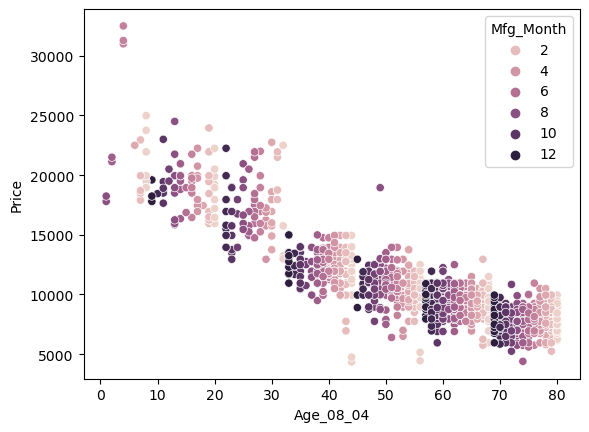

In [222]:
sns.scatterplot(x = 'Age_08_04', y = 'Price' ,hue = 'Mfg_Month',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

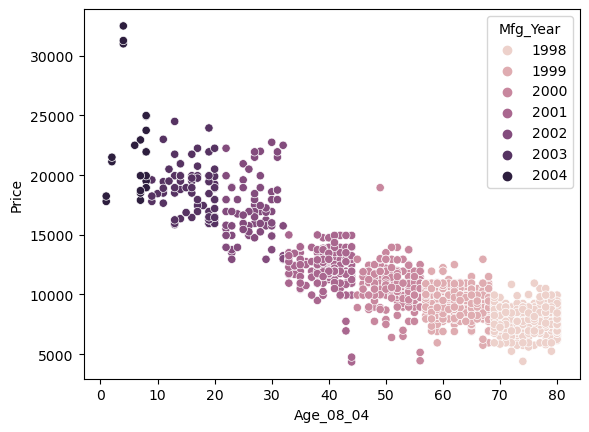

In [223]:
sns.scatterplot(x = 'Age_08_04', y = 'Price' ,hue = 'Mfg_Year',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

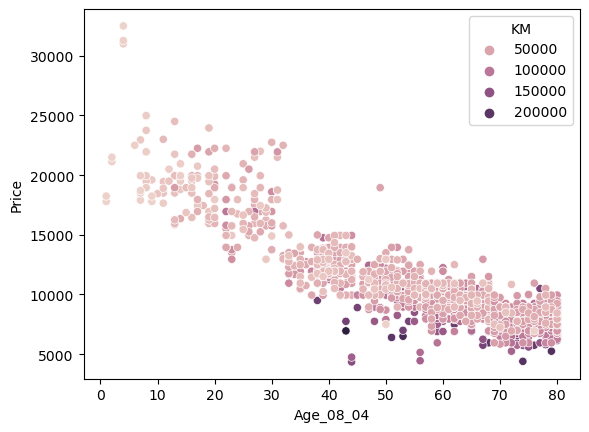

In [224]:
sns.scatterplot(x = 'Age_08_04', y = 'Price' ,hue = 'KM',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

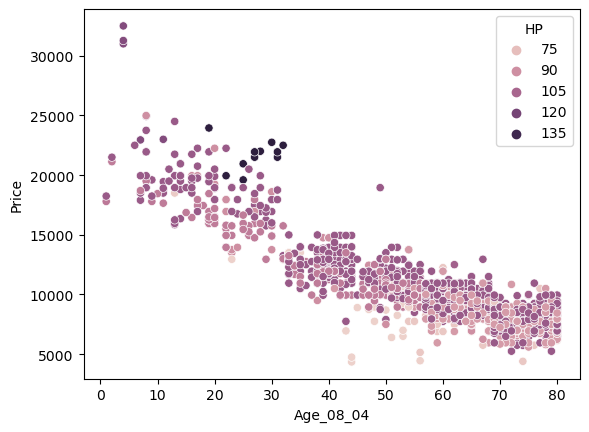

In [225]:
sns.scatterplot(x = 'Age_08_04', y = 'Price' ,hue = 'HP',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

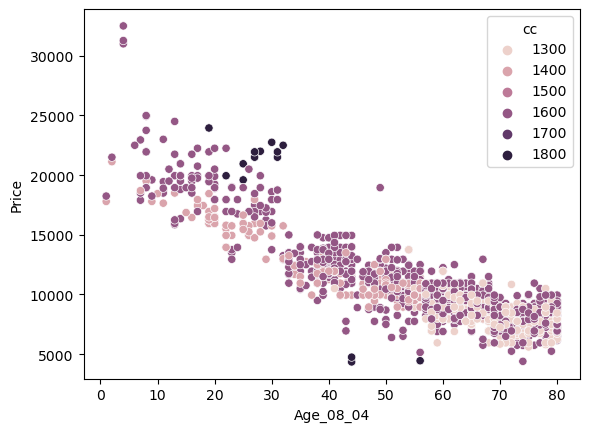

In [226]:
sns.scatterplot(x = 'Age_08_04', y = 'Price' ,hue = 'cc',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

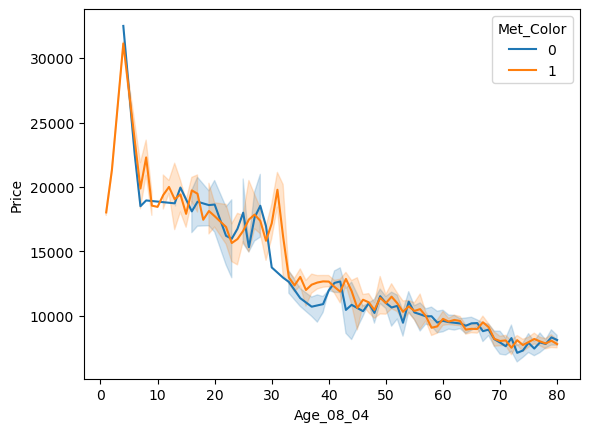

In [227]:
sns.lineplot(x = 'Age_08_04', y = 'Price' ,hue = 'Met_Color',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

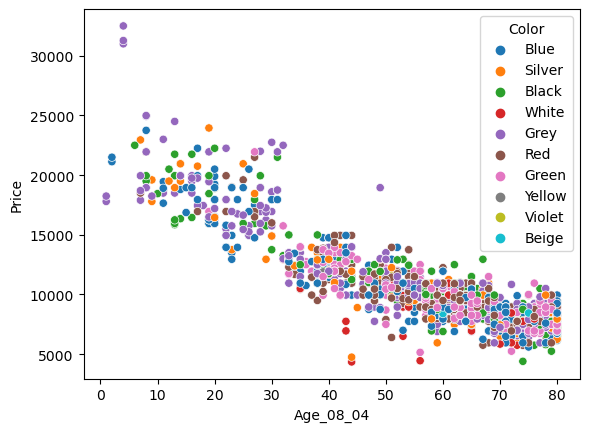

In [228]:
sns.scatterplot(x = 'Age_08_04', y = 'Price' ,hue = 'Color',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

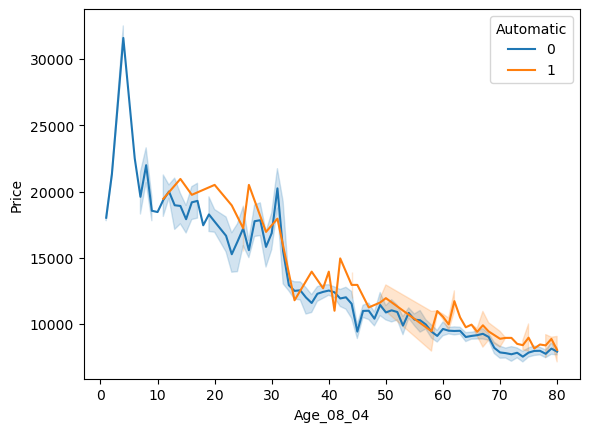

In [229]:
sns.lineplot(x = 'Age_08_04', y = 'Price' ,hue = 'Automatic',data = df)

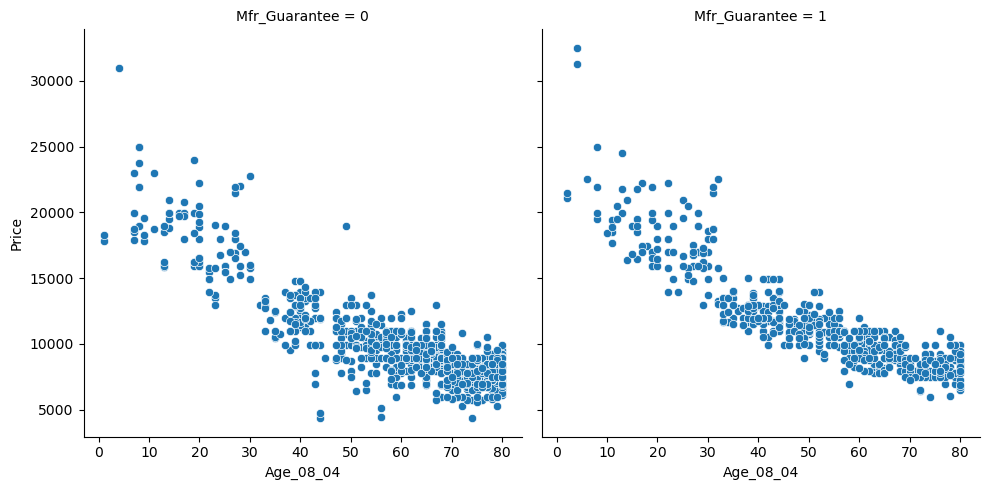

In [230]:
sns.relplot(x = 'Age_08_04', y = 'Price' ,col = 'Mfr_Guarantee',data = df)

<Axes: xlabel='Age_08_04', ylabel='Price'>

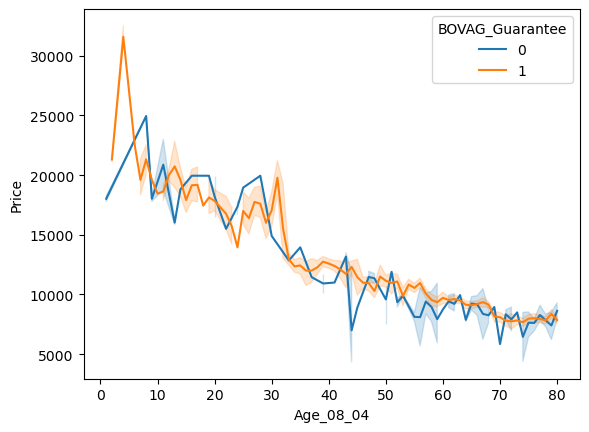

In [231]:
sns.lineplot(x = 'Age_08_04', y = 'Price' ,hue = 'BOVAG_Guarantee',data = df)

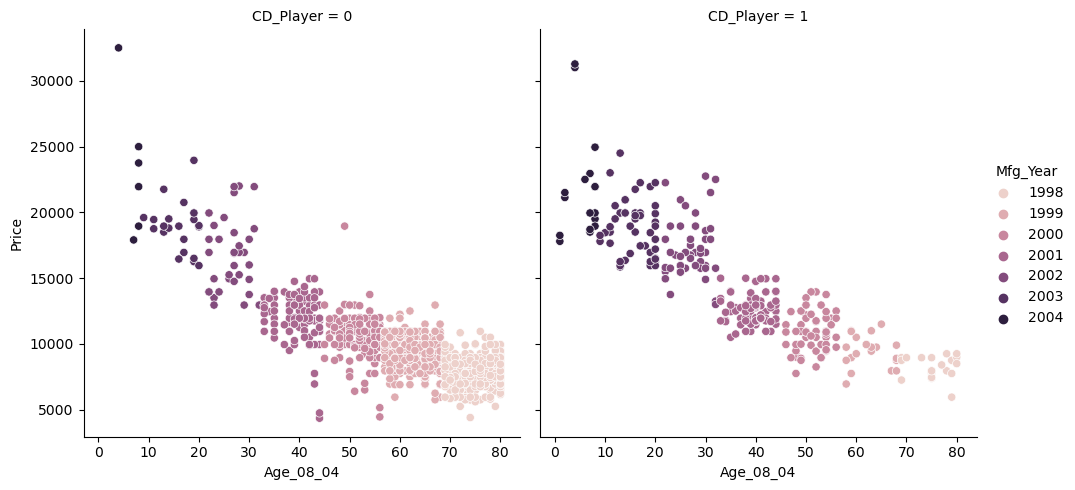

In [232]:
sns.relplot(x = 'Age_08_04', y = 'Price' ,hue = 'Mfg_Year' ,col = 'CD_Player',data = df)